In [3]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
#from ocean_c_lab_tools import *
from celluloid import Camera 
#import PyCO2SYS as csys
import seawater as sw
import cartopy.crs as ccrs
from roms_regrid import *

In [5]:
x=xr.open_mfdataset('/global/cfs/cdirs/m4632/uheede/dye_tracer/Iceland4_multidye_np4/Iceland4_linedye_rnd.2012060[2-6]000000.nc', combine='nested', concat_dim=["time"])
attrs = {'units': 'seconds since 2000-01-01'}
ds = xr.Dataset({'time': ( x['ocean_time'].load())})
ds = xr.Dataset({'time': ('time', x['ocean_time'].values, attrs)})
test=xr.decode_cf(ds)

In [19]:
x=xr.open_mfdataset('/global/cfs/cdirs/m4632/uheede/dye_tracer/Iceland4_multidye_np4/Iceland4_linedye_rnd.2012060[2-8]000000.nc', combine='nested', concat_dim=["time"])
#dye1=x['dye1'].isel(s_rho=99).load()
dye2=x['dye2'].isel(s_rho=99).load()

In [7]:
dye2

<xarray.DataArray 'dye2' (time: 144, eta_rho: 722, xi_rho: 1442)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [0.0000000e+00, 2.4695068e-15, 3.8772738e-15, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.6053782e-15, 2.5053020e-15, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.3082935e-17, 8.6165869e-17, 9.6455936e-17, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.4012985e-45, 1.4012985e-45, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 2.8025969e-45, 4.2038954e-45, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 3.4419712e-14, 4.9948062e-14, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 2.1551988e-14, 3.0717504e-14, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [7.1297918e-16, 1.4259584e-15, 1.4087198e-15, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: time, eta_rho, xi_rho
Attributes:
    long_name:  dye2
    units:      na

In [20]:
mean=dye2.where(dye2>0.0000001).mean('eta_rho',skipna=True).mean('xi_rho',skipna=True)

In [17]:
obs_patch=[1543773,171709,45353,24234,16910,7120,3936,2949,2778]
hrs=[0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8]

Text(0, 0.5, 'SF6 area')

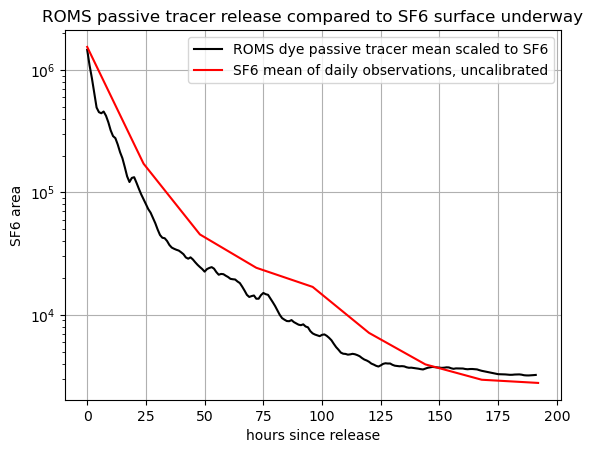

In [22]:
plt.plot(mean*10**7.55,color='black',label='ROMS dye passive tracer mean scaled to SF6')
plt.plot(hrs,obs_patch,color='red',label='SF6 mean of daily observations, uncalibrated')
#plt.plot(y)
plt.yscale("log") 
plt.title('ROMS passive tracer release compared to SF6 surface underway')
#plt.xlabel('hours since release')
#plt.ylim(10**3,1.2**5)
plt.grid()
plt.legend()
plt.xlabel('hours since release')
plt.ylabel('SF6 area')
#plt.xscale("log") 